In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('solar power.csv')

In [13]:
data.head()

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
0,2.17,31,1035.0,0.0,0.0,0.0,0,0,0,0.00,...,312.71,9.36,22.62,6.62,337.62,24.48,58.753108,83.237322,128.33543,454.10095
1,2.31,27,1035.1,0.0,0.0,0.0,0,0,0,1.78,...,294.78,5.99,32.74,4.61,321.34,21.96,45.408585,75.143041,139.65530,1411.99940
2,3.65,33,1035.4,0.0,0.0,0.0,0,0,0,108.58,...,270.00,3.89,56.31,3.76,286.70,14.04,32.848282,68.820648,152.53769,2214.84930
3,5.82,30,1035.4,0.0,0.0,0.0,0,0,0,258.10,...,323.13,3.55,23.96,3.08,339.44,19.80,22.699288,64.883536,166.90159,2527.60920
4,7.73,27,1034.4,0.0,0.0,0.0,0,0,0,375.58,...,10.01,6.76,25.20,6.62,22.38,16.56,19.199908,63.795208,182.13526,2640.20340


In [14]:
data.isnull().sum()

temperature_2_m_above_gnd            0
relative_humidity_2_m_above_gnd      0
mean_sea_level_pressure_MSL          0
total_precipitation_sfc              0
snowfall_amount_sfc                  0
total_cloud_cover_sfc                0
high_cloud_cover_high_cld_lay        0
medium_cloud_cover_mid_cld_lay       0
low_cloud_cover_low_cld_lay          0
shortwave_radiation_backwards_sfc    0
wind_speed_10_m_above_gnd            0
wind_direction_10_m_above_gnd        0
wind_speed_80_m_above_gnd            0
wind_direction_80_m_above_gnd        0
wind_speed_900_mb                    0
wind_direction_900_mb                0
wind_gust_10_m_above_gnd             0
angle_of_incidence                   0
zenith                               0
azimuth                              0
generated_power_kw                   0
dtype: int64

In [4]:
X = data.drop(columns=['generated_power_kw'])
y = data['generated_power_kw']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [17]:
y_pred = model.predict(X_test)

In [18]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [19]:
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 257589.0576940823
R-squared Score: 0.7180084563489013


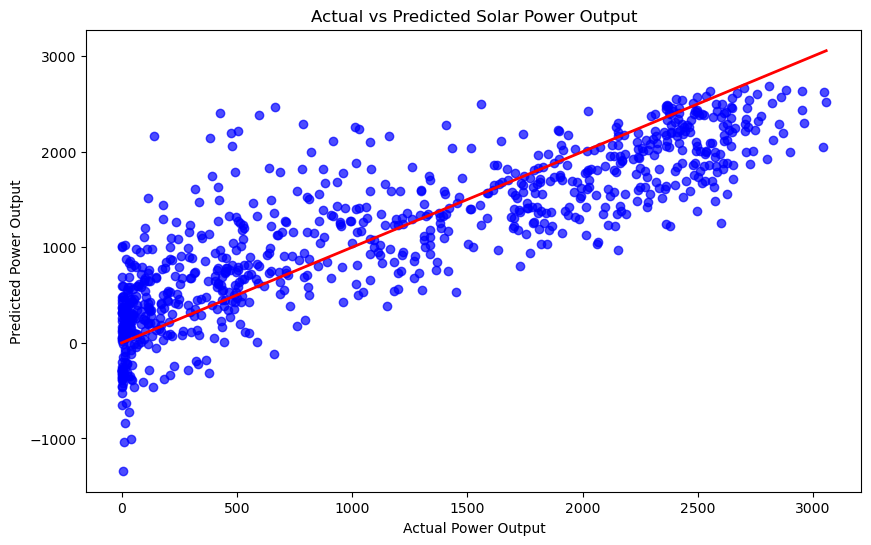

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel("Actual Power Output")
plt.ylabel("Predicted Power Output")
plt.title("Actual vs Predicted Solar Power Output")
plt.show()


In [21]:
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

Model Coefficients: [-9.23579399e+00 -4.26422332e+00  1.62158237e+01 -3.88787260e+00
  5.94561202e+02 -1.46897897e+00 -1.23601957e+00 -1.14826326e+00
 -1.36565915e+00  1.23699833e+00  1.66267890e+01  3.01610361e-01
  9.13831501e+00  1.59422927e-01 -3.04550657e+01 -2.62990784e-01
 -3.07120482e+00 -1.50592451e+01 -7.73077966e+00 -6.18397285e+00]
Model Intercept: -13043.98766953004


In [22]:
def predict_solar_power():
    print("\nEnter the following feature values:")
    features = []
    for col in X.columns:
        value = float(input(f"{col}: "))
        features.append(value)
    
    input_features = np.array(features).reshape(1, -1)
    prediction = model.predict(input_features)[0]
    print(f"\nPredicted Solar Power Output: {prediction:.2f} kW")

predict_solar_power()


Enter the following feature values:


temperature_2_m_above_gnd:  2.17	
relative_humidity_2_m_above_gnd:  31
mean_sea_level_pressure_MSL:  1035.4
total_precipitation_sfc:  0.0
snowfall_amount_sfc:  1
total_cloud_cover_sfc:  20
high_cloud_cover_high_cld_lay:  10
medium_cloud_cover_mid_cld_lay:  15
low_cloud_cover_low_cld_lay:  5
shortwave_radiation_backwards_sfc:  300
wind_speed_10_m_above_gnd:  3.5
wind_direction_10_m_above_gnd:  180
wind_speed_80_m_above_gnd:  5
wind_direction_80_m_above_gnd:  190
wind_speed_900_mb:  4
wind_direction_900_mb:  185
wind_gust_10_m_above_gnd:  20
angle_of_incidence:  45
zenith:  60
azimuth:  150



Predicted Solar Power Output: 2380.97 kW


C:\Users\Shreya Bhelekar\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
